## Summary
### dataset
- 20180816

### algo
#### univmon
- cardinality
- entropy
- ARE

#### hll
- cardinality

#### CM
- ARE
- entropy

#### CS
- ARE

In [33]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random

---

## Useless, Just test

In [2]:
algos = ['hll']
epochs = ['10', '20', '30']
for algo in algos:
    for epoch in epochs:
        path = f"../QuerySketch/{algo}/equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/"\
                f"dstIP,dstPort/row_1_width_65536_epoch_{epoch}/data.pkl"
        # print(path)
        print(algo, epoch)
        with open(path, 'rb') as f:
            ll = pickle.load(f)

        print(ll[0])
# hll: [true_cardinality, sim_cardinality, sim_error]

hll 10
[370136, 372725.0427158111, 0.6994841668497829]
hll 20
[642213, 639201.6991977607, 0.4688944014274599]
hll 30
[892022, 890450.6935215618, 0.17615109026887235]


In [127]:
algos = ['cm', 'cs']
epochs = ['10', '20', '30']
res = {}
for algo in algos:
    res[algo] = []
    for epoch in epochs:
        path = f"../QuerySketch/{algo}/equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/"\
                f"dstIP,dstPort/row_3_width_16384_epoch_{epoch}/data.pkl"
        print(algo, epoch)
        with open(path, 'rb') as f:
            ll = pickle.load(f)
        res[algo].append(ll)
        # print('median:', np.median(ll)
        print(ll[0])
        
# cm: [entropy, entropy_est, relative_entropy_error, sim_ARE_error]
# cs: [sim_ARE_error]

cm 10
[14.199341081846779, 8.914975100819563, 37.21557183933726, 1.1849501949028594]
cm 20
[14.50608110306574, 10.01352500194074, 30.97015706175485, 1.5258160334106123]
cm 30
[14.72510012321994, 10.642739640200338, 27.723821562219108, 1.6765481128764588]
cs 10
[0.8399614963328078]
cs 20
[0.9242635303225271]
cs 30
[1.0238832257486066]


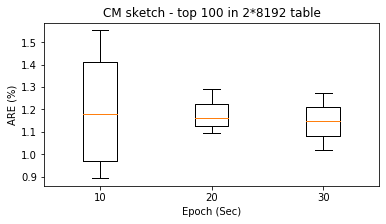

In [92]:
fig = plt.figure(figsize =(6, 3))
plt.boxplot(np.array(res['cm'], dtype=object))
plt.xticks([1, 2, 3], epochs)
plt.xlabel("Epoch (Sec)")
plt.ylabel("ARE (%)")
plt.title("CM sketch - top 100 in 2*8192 table")
plt.show()

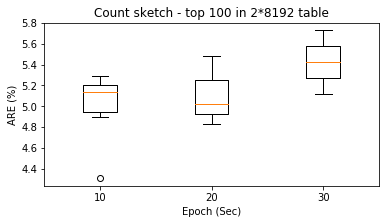

In [93]:
fig = plt.figure(figsize =(6, 3))
plt.boxplot(np.array(res['cs'], dtype=object))
plt.xticks([1, 2, 3], epochs)
plt.xlabel("Epoch (Sec)")
plt.ylabel("ARE (%)")
plt.title("Count sketch - top 100 in 2*8192 table")
plt.show()

In [134]:
algos = ['univmon']
epochs = ['10', '20', '30']
res = {}
for algo in algos:
    res[algo] = []
    for epoch in epochs:
        path = f"../QuerySketch/{algo}/equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/"\
                f"dstIP,dstPort/row_4_width_1024_epoch_{epoch}/data.pkl"
        print(algo, epoch)
        with open(path, 'rb') as f:
            ll = pickle.load(f)
        res[algo].append(ll)
        print(ll[0])
# UNIV: [true_entropy, sim_entropy, sim_entropy_error, true_card, sim_card, sim_card_error, ARE]

univmon 10
[14.199341081783466, 13.78083210235174, 2.947383100534412, 370136, 372366, 0.6024812501350855, 2.4290987745191392]
univmon 20
[14.506081103084712, 14.917817354604118, 2.8383699814821117, 642213, 604344, 5.896641768385255, 3.5819193864220167]
univmon 30
[14.725100123244468, 16.13346690241647, 9.56439526647977, 892022, 767488, 13.960866436029603, 5.955746866941321]


---

## Scenario 1 & 2
### random algo. & random query
### random algo. & cross query

In [3]:
## read_data from result of control plane
def read_data(algos, row=4, width=1024, flowkey='dstIP,dstPort', epochs=['10', '20', '30'], dataset='equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/'):
    res = {}
    for algo in algos:
        res[algo] = []
        for epoch in epochs:
            path = f"../../result_cp/QuerySketch/{algo}/{dataset}"\
                    f"{flowkey}/row_{row}_width_{width}_epoch_{epoch}/data.pkl"
            # print(algo, epoch)
            with open(path, 'rb') as f:
                ll = pickle.load(f)
            res[algo].append(ll)
            # print(ll[0])
    return res

In [4]:
## call read_data
## temporary function
def tmp_call_read_data(flowkey='dstIP,dstPort'):
    result = {}

    algos = ['univmon']
    r = 4
    w = 1024
    tmp = read_data(algos, r, w, flowkey)
    result = {**result, **tmp}

    algos = ['cm', 'cs']
    r = 4
    w = 16384
    tmp = read_data(algos, r, w, flowkey)
    result = {**result, **tmp}

    algos = ['hll']
    r = 1
    w = 16384
    tmp = read_data(algos, r, w, flowkey)
    result = {**result, **tmp}
    return result
result = tmp_call_read_data()

#### cardinality
- hll

#### entropy
- CM

#### ARE (Top k)
- CM
- CS

#### general
- Univmon

In [5]:
## Define metric -> algos
def get_metrics():
    metrics = {}
    metrics['hh'] = ['cm', 'cs']
    metrics['card'] = ['hll']
    metrics['entropy'] = ['cm']
    return metrics
metrics = get_metrics()
general_metrics = ['univmon']

In [6]:
def pick_algo(metrics=metrics):
    ret = {}
    for k in metrics:
        ll = metrics[k] + general_metrics
        ret[k] = ll[random.randint(0, len(ll)-1)]
    return ret

In [7]:
## Define mapping dictionary for index <---> metric
algos = ['univmon', 'cm', 'cs', 'hll']
def get_metric_mapping(algos = ['univmon', 'cm', 'cs', 'hll']):
    mapping = {}
    for k in algos:
        mapping[k] = {}

    # UNIV: [true_entropy, sim_entropy, sim_entropy_error, true_card, sim_card, sim_card_error, ARE]
    mapping['univmon']['hh'] = 6
    mapping['univmon']['card'] = 5 
    mapping['univmon']['entropy'] = 2
    # cm: [entropy, entropy_est, relative_entropy_error, sim_ARE_error]
    mapping['cm']['hh'] = 3
    mapping['cm']['entropy'] = 2
    # cs: [sim_ARE_error]
    mapping['cs']['hh'] = 0
    # hll: [true_cardinality, sim_cardinality, sim_error]
    mapping['hll']['card'] = 2
    return mapping
mapping = get_metric_mapping(algos)

In [8]:
VERBOSE = False

times = 20
epochs = ['10', '20', '30']
flowkeys = ["srcIP", "dstIP", "srcIP,srcPort", "dstIP,dstPort",]

rand_epoch = []
rand_flowkeys = []

rand_algo = {}
rand_val = {}
cross_algo = {}
cross_val = {}
for k in metrics:
    rand_algo[k] = []
    rand_val[k] = []
    cross_algo[k] = []
    cross_val[k] = []

# how many experiment times
for t in range(times):
    epoch = random.randint(0, len(epochs)-1)
    flowkey = random.randint(0, len(flowkeys)-1)
    if VERBOSE:
        print('epoch:', epochs[epoch])
        print('flowkey:', flowkeys[flowkey])
    
    # read data
    data = tmp_call_read_data(flowkeys[flowkey])
    
    ### random query
    if VERBOSE:
        print('====random query====')
    picked = pick_algo()
    # picked algos for each metric
    for p_metric, p_algo in picked.items():
        if VERBOSE:
            print(p_metric +': '+ p_algo)
        # data in each epoch
        ll = []
        for e in range(len(data[p_algo][epoch])):
            index = mapping[p_algo][p_metric]
            # print(p_algo, p_metric, index)
            # print(data[p_algo][epoch][e][index])
            ll.append(data[p_algo][epoch][e][index])
        # print(np.median(ll))
        rand_algo[p_metric].append(p_algo)
        rand_val[p_metric].append(np.median(ll))
    rand_flowkeys.append(flowkey)
    rand_epoch.append(epoch)
    
    ### cross query
    if VERBOSE:
        print('====cross query====')
    for k in rand_algo:
        cross_algo[k].append(rand_algo[k][t])
        cross_val[k].append(rand_val[k][t])
    
    # picked algos for each metric
    for p_metric, p_algo in picked.items():
        # find every metric
        for m in metrics:
            # if it's not repeat metric 
            #    and the destination algo != current algo
            #    and this algo can do this metric
            if m != p_metric and picked[m] != p_algo and (p_algo in metrics[m] or p_algo in general_metrics):
                # if it's performance is better than destinatiom (original random query), replace it
                ll = []
                for e in range(len(data[p_algo][epoch])):
                    index = mapping[p_algo][m]
                    # print(p_algo, m, index)
                    # print(data[p_algo][epoch][e][index])
                    ll.append(data[p_algo][epoch][e][index])
                # print(np.median(ll))
                new_val = np.median(ll)
                # if it's better
                if new_val < rand_val[m][t]:
                    if VERBOSE:
                        print('REPLACED!! ' + rand_algo[m][t] + ': ' + m + ' ---> ' + p_algo + ': ' + p_metric)
                    cross_algo[m][t] = p_algo
                    cross_val[m][t] = new_val
    if VERBOSE:
        print()

In [9]:
print(rand_algo['card'])
print(cross_algo['card'])

['hll', 'univmon', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll']
['hll', 'univmon', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll', 'hll', 'univmon', 'univmon', 'univmon', 'univmon', 'hll']


In [11]:
# print(rand_val)
# print(cross_val)
replace_times = {}

for k in rand_algo:
    cnt = 0
    for i in range(len(rand_algo[k])):
        if rand_algo[k][i] != cross_algo[k][i]:
            cnt += 1
    replace_times[k] = cnt
print('total test times:', times)
print(replace_times)

total test times: 20
{'hh': 3, 'card': 0, 'entropy': 7}


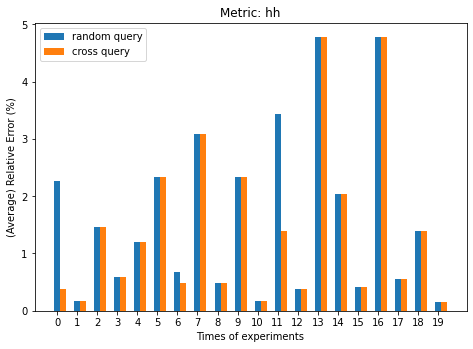

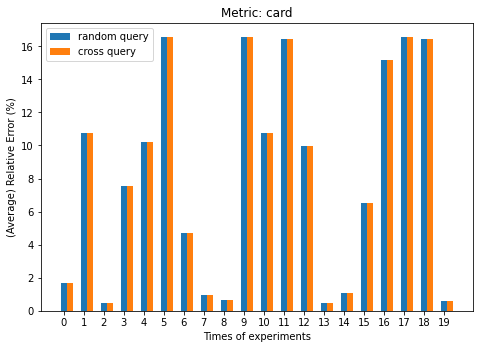

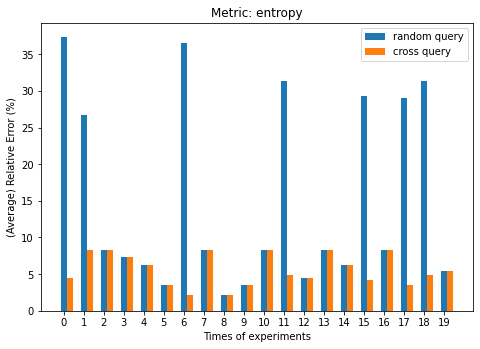

In [12]:
# multiple bar plot
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

for m in metrics:
    X = np.arange(len(rand_algo[m]))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    # plt.xticks(X, rand_algo[m] + cross_algo[m])
    plt.xticks(X, X)
    ax.bar(X + 0, rand_val[m], width = 0.3, label='random query')
    ax.bar(X + 0.3, cross_val[m], width = 0.3, label='cross query')
    plt.title("Metric: " + m)
    plt.ylabel("(Average) Relative Error (%)")
    plt.xlabel("Times of experiments")
    plt.legend()
    plt.show()

#### Under different situation, The same metric has different best performance algo. 
- (like epoch, flowkey, etc.)
- e.g. Many hll were replace by UnivMon in cardinality, but isn't always

---

## Measure time required to get 1 acc-res profile

In [38]:
algos = ['CS', 'UnivMon']
xlabels_num_parallel = [6, 36, 108]

# data plane computation on C++ simulator
# time (min)
data = {}
for k in algos:
    data[k] = {}
    data[k]['real'] = []
    data[k]['all'] = []

data['CS']['real'] = [4, 11, 24]
data['CS']['all'] = [22, 195, 604]
data['UnivMon']['real'] = [5, 16, 30]
data['UnivMon']['all'] = [28, 280, 751]

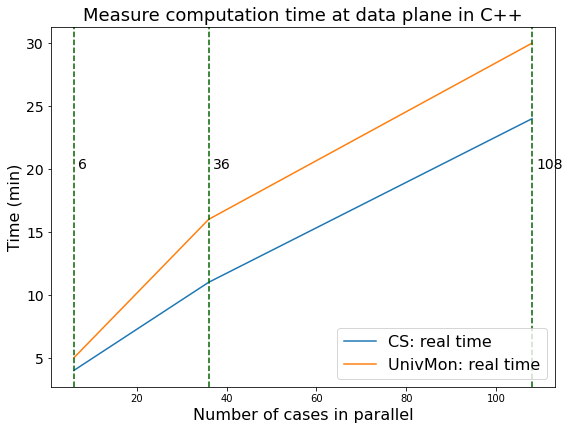

In [86]:
fig = plt.figure(figsize = (7, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
for algo in algos:
    bp = ax.plot(xlabels_num_parallel, data[algo]['real'], label=f'{algo}: real time')
    # bp = ax.plot(xlabels_num_parallel, data[algo]['all'], label=f'{algo}: all CPU time')
for num in xlabels_num_parallel:
    plt.axvline(x = num, color = 'darkgreen', linestyle='--')
    ax.text(num+1, 20, f'{num}', fontsize=14)
    
# ax.set_xticklabels([0] + xlabels_num_parallel, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Time (min)", fontsize=16)
plt.xlabel("Number of cases in parallel", fontsize=16)

plt.title("Measure computation time at data plane in C++", fontsize=18)

# legend_patch = []
# legend_patch.append(mpatches.Patch(color='crimson', label='Best algorithms'))
# legend_patch.append(mpatches.Patch(color='royalblue', label='General algorithm'))
# plt.legend(handles=legend_patch, fontsize=16)
plt.legend(fontsize=16)
# show plot
plt.show()

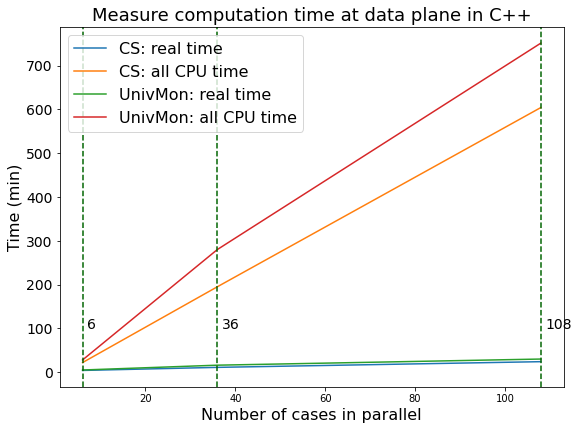

In [87]:
fig = plt.figure(figsize = (7, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
for algo in algos:
    bp = ax.plot(xlabels_num_parallel, data[algo]['real'], label=f'{algo}: real time')
    bp = ax.plot(xlabels_num_parallel, data[algo]['all'], label=f'{algo}: all CPU time')
for num in xlabels_num_parallel:
    plt.axvline(x = num, color = 'darkgreen', linestyle='--')
    ax.text(num+1, 100, f'{num}', fontsize=14)
    
# ax.set_xticklabels([0] + xlabels_num_parallel, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Time (min)", fontsize=16)
plt.xlabel("Number of cases in parallel", fontsize=16)

plt.title("Measure computation time at data plane in C++", fontsize=18)

# legend_patch = []
# legend_patch.append(mpatches.Patch(color='crimson', label='Best algorithms'))
# legend_patch.append(mpatches.Patch(color='royalblue', label='General algorithm'))
# plt.legend(handles=legend_patch, fontsize=16)
plt.legend(fontsize=16)
# show plot
plt.show()

---

## HLL test
accuracy at different width

In [ ]:
## TODO, complete test

In [32]:
algos = ['hll']
r = 1
ww = [4096, 8192, 16384, 65536]
flowkeys = ["srcIP", "dstIP", "srcIP,srcPort", "dstIP,dstPort",]

for w in ww:
    for flowkey in flowkeys:
        tmp = read_data(algos, r, w, flowkey)
        ll = []
        for e in range(3):
            for d in tmp['hll'][e]:
                ll.append(d[mapping['hll']['card']])
            print(w, flowkey, e, np.median(ll))
            print(w, flowkey, e, np.mean(ll))

4096 srcIP 0 1.8702037696032887
4096 srcIP 0 2.3553398891730932
4096 srcIP 1 2.1782359825760884
4096 srcIP 1 2.409818652603476
4096 srcIP 2 2.1782359825760884
4096 srcIP 2 2.3406941392573932
4096 dstIP 0 1.8965467209935407
4096 dstIP 0 1.9219870559693026
4096 dstIP 1 1.6311443206289629
4096 dstIP 1 1.77927293639422
4096 dstIP 2 1.3961830763433063
4096 dstIP 2 1.609387232386068
4096 srcIP,srcPort 0 1.5018391302037462
4096 srcIP,srcPort 0 1.435071241849618
4096 srcIP,srcPort 1 1.342357383085127
4096 srcIP,srcPort 1 1.1612276033229434
4096 srcIP,srcPort 2 1.4325167211618781
4096 srcIP,srcPort 2 1.3496404729877034
4096 dstIP,dstPort 0 1.2143482122367648
4096 dstIP,dstPort 0 1.6063581654963937
4096 dstIP,dstPort 1 1.3051803259251311
4096 dstIP,dstPort 1 1.5700499504896428
4096 dstIP,dstPort 2 1.1235160985483983
4096 dstIP,dstPort 2 1.3896912693399122
8192 srcIP 0 1.5284094396611232
8192 srcIP 0 1.2532858736007808
8192 srcIP 1 1.4878906154186253
8192 srcIP 1 1.346692900934717
8192 srcIP 2 1.